In [65]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

- Has the network latency gone up since we switched internet service providers?

$H_0$ : $\mu_0 = \mu_1$ where $\mu_t$ is the mean latency for a given time period, $t$. Network latency has not increased

$H_a$ : $\mu_0 \neq \mu_1$ Network latency has changed

True positive : The latency has changed, and it has

True negative : The latency has not changed, and it hasn't 

Type I Error : Thinking that the latency has changed when it has not.

Type II Error : Think that the latency is the same, when it is no longer the same.
 
 
- Is the website redesign any good?

Let $\mu_k$ be the mean daily site visits at time period $k$

$H_0$ : $\mu_0 = \mu_1$ - the mean daily site vist length hasn't changed

$H_a$ : $\mu_0 \neq \mu_1$ mean daily site visits have changed

True positive : site visit length has changed, and it has

True negative : site visit length has not changed, and it hasn't

Type I Error : The design change is good (site vist length has changed) when it has no effect

Type II Error : The design change had no effect, when it has had an effect


- Is our television ad driving more sales?

Let $\mu_g$ be average sales in $g$, a tv media market

$H_0$ : $\mu_g = \mu_{g'}$

Alt: $H_0$ : $s_0 \leq s_1$ where $s_t$ is the sales volumes at time $t$. w/ $H_a$ : $s_0 > s_1$

$H_a$ : $\mu_g \neq \mu_{g'}$

True positive : ad has had some effect on sales

True negative : ad has had no effect on sales

Type I Error : ad has an effect on sales, but is assumed not to have had an effect

Type II Error :  ad has no effect, but in fact changed sales

## T-Test

1.

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [1]:
#office 1 stats
size_office_1 = 40
mu_office_1 = 90
sigma_office_1 = 15

#office 2 stats
size_office_2 = 50
mu_office_2 = 100
sigma_office_2 = 20

alpha = 0.05

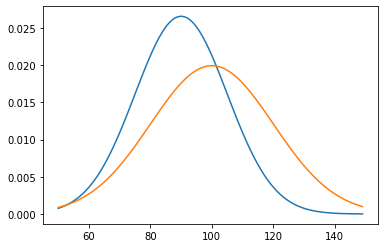

In [66]:
# can visualize these distributions
x = np.arange(50, 150)
y1 = stats.norm(mu_office_1, sigma_office_1).pdf(x)
y2 = stats.norm(mu_office_2, sigma_office_2).pdf(x)

plt.plot(x, y1)
plt.plot(x, y2)

$H_0$ : mu_office_1 = mu_office_2

$H_a$ : mu_office_1 $\neq$ mu_office_2

In [67]:
# calculate the t stat and the p value
t, p = stats.ttest_ind_from_stats(mu_office_1, sigma_office_1, size_office_1, mu_office_2, sigma_office_2, size_office_2, equal_var = False)

In [68]:
t, p

(-2.7091418459143854, 0.00811206270346016)

In [69]:
# take p since this is a two tail test
p < alpha

True

There are grounds to reject $H_0$. The sales time is different at the two offices.

2.

Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?



In [74]:
from pydataset import data
df_mpg = data('mpg')
df_mpg['f_ef'] = (df_mpg.cty + df_mpg.hwy)/2
# can use the harmonic mean, probs is more accurate
df_mpg['f_ef'] = stats.hmean(df_mpg[{'cty', 'hwy'}], axis =1)
df_mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,f_ef
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,22.638298
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,24.360000
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,19.809524
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,21.272727


- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

$H_0$ : $\mu_{2008} = \mu_{1999}$

$H_a$ :$\mu_{2008} \neq \mu_{1999}$

$\alpha$ = 0.05

In [75]:
#make the two series sets:
fe_2008 = df_mpg[df_mpg.year==2008].f_ef
fe_1999 = df_mpg[df_mpg.year==1999].f_ef
fe_2008.mean(), fe_1999.mean()

(19.488662986569054, 19.68238764869729)

In [80]:
# compare variance:
fe_2008.var(), fe_1999.var()

(22.550836772260343, 25.850396545865912)

In [81]:
s, p = stats.levene(fe_2008, fe_1999)
p < 0.05 #we will use equal_var=True

False

In [84]:
# this is a two tailed test so can keep p as is
t, p = stats.ttest_ind(fe_2008, fe_1999, equal_var = True)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [87]:
p < alpha

False

<AxesSubplot:>

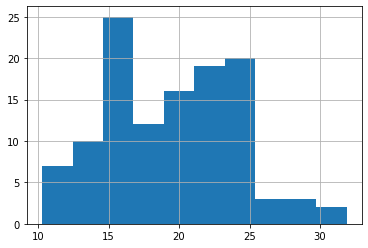

In [78]:
fe_2008.hist()

<AxesSubplot:>

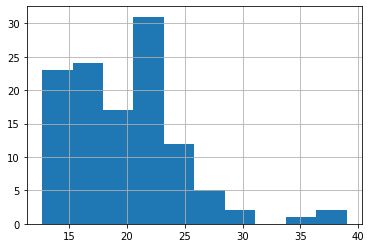

In [79]:
fe_1999.hist()

It is unlikely that the fuel efficiency has changed. $H_0$ is not rejected

- Are compact cars more fuel-efficient than the average car?

$H_0$ : $\mu_{compact} \leq \mu$

$H_a$ : $\mu_{compact} > \mu$

Where $\mu$ is mpg for average car

This is a one-sample t-test

In [93]:
#make two series and look at their mean
compact = df_mpg[df_mpg['class'] == 'compact'].f_ef
population = df_mpg.f_ef
compact.mean(), population.mean()

(23.500416808701296, 19.585525317633177)

(array([[ 0.,  0.,  3., 13., 20.,  6.,  3.,  1.,  0.,  1.],
        [20., 48., 39., 51., 48., 16.,  8.,  1.,  1.,  2.]]),
 array([10.28571429, 13.15587703, 16.02603978, 18.89620253, 21.76636528,
        24.63652803, 27.50669078, 30.37685353, 33.24701627, 36.11717902,
        38.98734177]),
 <a list of 2 BarContainer objects>)

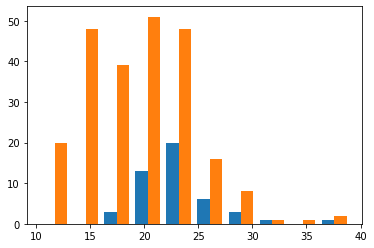

In [101]:
plt.hist([compact, population])

In [96]:
#this a single tail test since H_0 contains <=
# will take p/2
t, p = stats.ttest_1samp(compact, population.mean())
t, p/2

(7.512360093161354, 7.808833174403864e-10)

In [97]:
p/2 < alpha

True

It is likely that compact cars are more fuel efficient than non-compact cars.  $H_0$ can be reasonably rejected.

- Do manual cars get better gas mileage than automatic cars?

$H_0$ : $\mu_{manual} \leq \mu_{automatic}$

$H_a$ : $\mu_{manual} > \mu_{automatic}$

In [102]:
# make two series and look at their mean
automatic = df_mpg[df_mpg.trans.str.contains('auto')].f_ef
manual = df_mpg[df_mpg.trans.str.contains('manual')].f_ef
manual.mean(), automatic.mean()

(21.629228592155194, 18.583199507835747)

In [112]:
manual.shape, automatic.shape

((77,), (157,))

<AxesSubplot:>

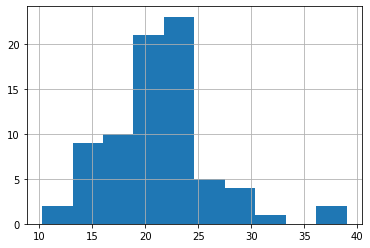

In [113]:
manual.hist()

<AxesSubplot:>

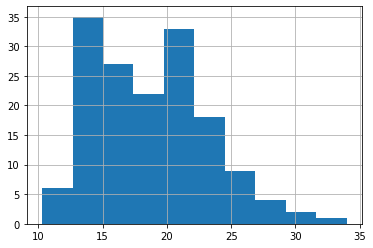

In [114]:
automatic.hist()

In [103]:
#compare variance
s, p = stats.levene(manual, automatic)
p < 0.05 #equal_var = True

False

In [120]:
#This is a single tail test, use p/2
t, p = stats.ttest_ind(manual, automatic, equal_var = True)
t, p

(4.652577547151351, 5.510464610044005e-06)

In [121]:
p/2 < alpha

True

It is likely that manual cars get better gas mileage than automatic. $H_0$ is likely untrue.

### the above used an avg of city and highway efficiency.  this might effect the results
re-run the test with just one of city or highway

$H_0$ : $\mu_{08hwy} = \mu_{99hwy}$

$H_a$ : $\mu_{08hwy} \neq \mu_{99hwy}$

In [106]:
#make the two series sets:
fe_2008 = df_mpg[df_mpg.year==2008].hwy
fe_1999 = df_mpg[df_mpg.year==1999].hwy
fe_2008.mean(), fe_1999.mean()

(23.45299145299145, 23.427350427350426)

In [107]:
# compare variance:
fe_2008.var(), fe_1999.var()
s, p = stats.levene(fe_2008, fe_1999)
p < 0.05 #we will use equal_var=True

False

In [108]:
# this is a two tailed test so can keep p as is
t, p = stats.ttest_ind(fe_2008, fe_1999, equal_var = True)
p < alpha

False

cannot reject $H_0$

$H_0$ : $\mu_{08city} = \mu_{99city}$

$H_a$ : $\mu_{08city} \neq \mu_{99city}$

In [109]:
#make the two series sets:
fe_2008 = df_mpg[df_mpg.year==2008].cty
fe_1999 = df_mpg[df_mpg.year==1999].cty
fe_2008.mean(), fe_1999.mean()

(16.700854700854702, 17.017094017094017)

In [110]:
# compare variance:
fe_2008.var(), fe_1999.var()
s, p = stats.levene(fe_2008, fe_1999)
p < 0.05 #we will use equal_var=True

False

In [111]:
# this is a two tailed test so can keep p as is
t, p = stats.ttest_ind(fe_2008, fe_1999, equal_var = True)
p < alpha

False

Cannot reject $H_0$